 ***Project Summary:*** Heart Disease Classification using Supervised Learning
This machine learning project focuses on predicting the presence of heart disease based on a labeled dataset (heart.csv) using several supervised classification models. The dataset is sourced from Kaggle and analyzed on Google Colab with full visualization and evaluation.

Mount Google Drive and Load Dataset

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
# Mount Google Drive and load the CSV file
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/heart.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


Exploratory Data Analysis (EDA) and Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

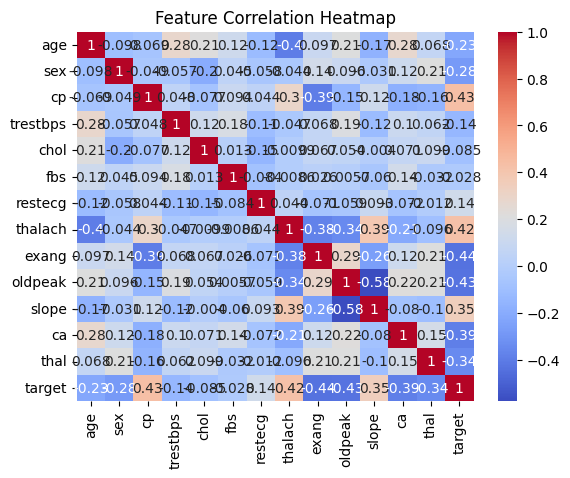

In [3]:
print(df.info())
print(df.describe())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Supervised Models and Evaluate

In [4]:
# 3.1 Logistic Regression with L1, L2, ElasticNet Regularization
log_models = {
    "L1": LogisticRegression(penalty='l1', solver='liblinear'),
    "L2": LogisticRegression(penalty='l2', solver='liblinear'),
    "ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000)
}


In [6]:
# 3.2 Ensemble Models: Random Forest, Gradient Boost, XGBoost, Bagging
ensemble_models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "Bagging": BaggingClassifier(estimator=LogisticRegression())
}


In [7]:
# 3.3 Stacking Classifier (Combining Models)
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('xgb', XGBClassifier(eval_metric='logloss'))
    ],
    final_estimator=LogisticRegression()
)


In [8]:
# Train and Evaluate Models
log_results = {}
ensemble_results = {}
metrics_summary = []

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


In [9]:
# Logistic Regression Models
for name, model in log_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    log_results[name] = acc
    metrics_summary.append([name, acc, prec, rec, f1])


In [10]:
# Ensemble Models
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ensemble_results[name] = acc
    metrics_summary.append([name, acc, prec, rec, f1])

In [11]:
# Stacking Classifier
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
metrics_summary.append(['Stacking', acc, prec, rec, f1])

Hyperparameter Tuning with GridSearchCV and RandomizedSearchCV

In [12]:
# GridSearchCV for Logistic Regression (L2)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)
print("\nBest GridSearchCV Params for L2 Logistic Regression:", grid_lr.best_params_)

# RandomizedSearchCV for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5, scoring='f1', n_iter=10, random_state=42)
random_rf.fit(X_train, y_train)
print("\nBest RandomizedSearchCV Params for Random Forest:", random_rf.best_params_)


Best GridSearchCV Params for L2 Logistic Regression: {'C': 0.01, 'solver': 'saga'}

Best RandomizedSearchCV Params for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 5}


Select Best Performing Model Based on F1-Score

In [13]:
metrics_df = pd.DataFrame(metrics_summary, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
best_model = metrics_df.sort_values(by='F1-Score', ascending=False).iloc[0]
print("\n✅ Best Performing Model:")
print(best_model)

# Save to CSV
metrics_df.to_csv("model_performance_summary.csv", index=False)



✅ Best Performing Model:
Model              L1
Accuracy     0.852459
Precision    0.870968
Recall        0.84375
F1-Score     0.857143
Name: 0, dtype: object


 ROC Curves and Confusion Matrices

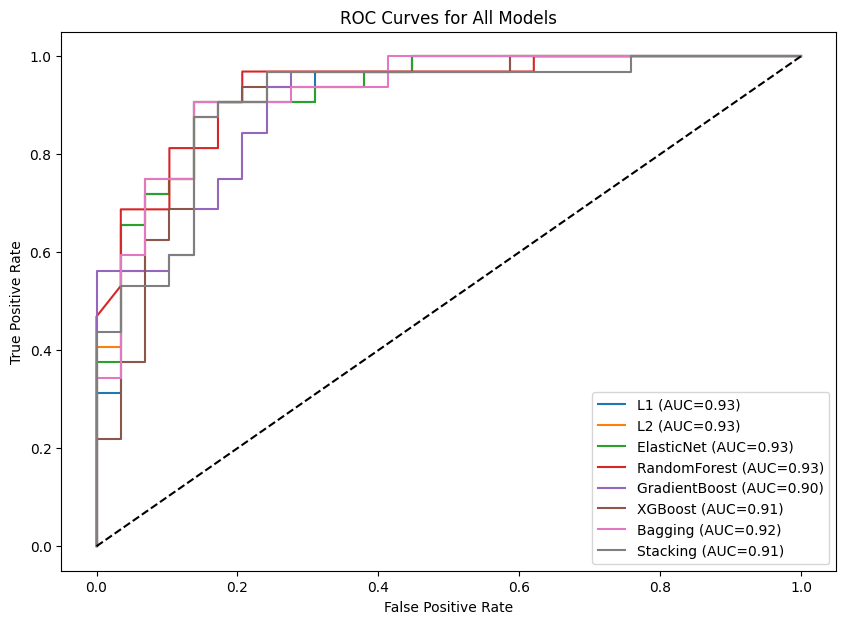

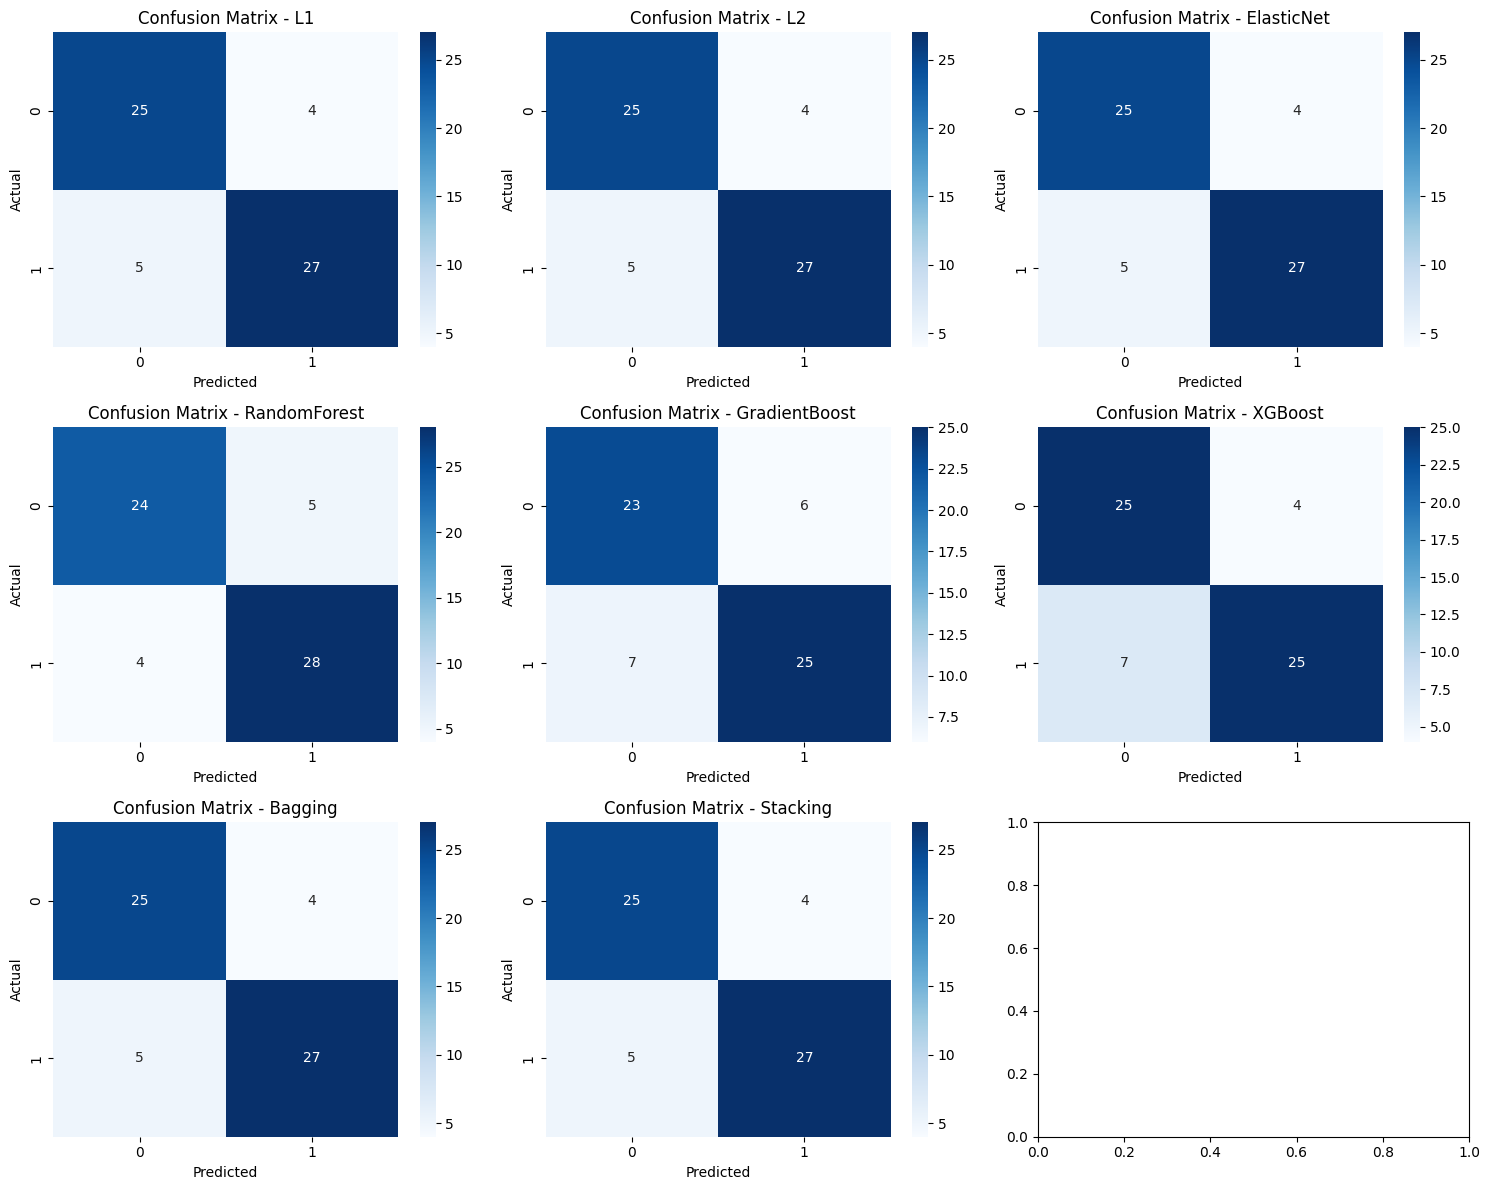

In [14]:
from sklearn.metrics import RocCurveDisplay

model_objects = {**log_models, **ensemble_models, 'Stacking': stack_model}

plt.figure(figsize=(10, 7))
for name, model in model_objects.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.savefig("roc_curves.png")
plt.show()

# Confusion Matrices
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(model_objects.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.savefig("confusion_matrices.png")
plt.show()

Feature Importance Visualization

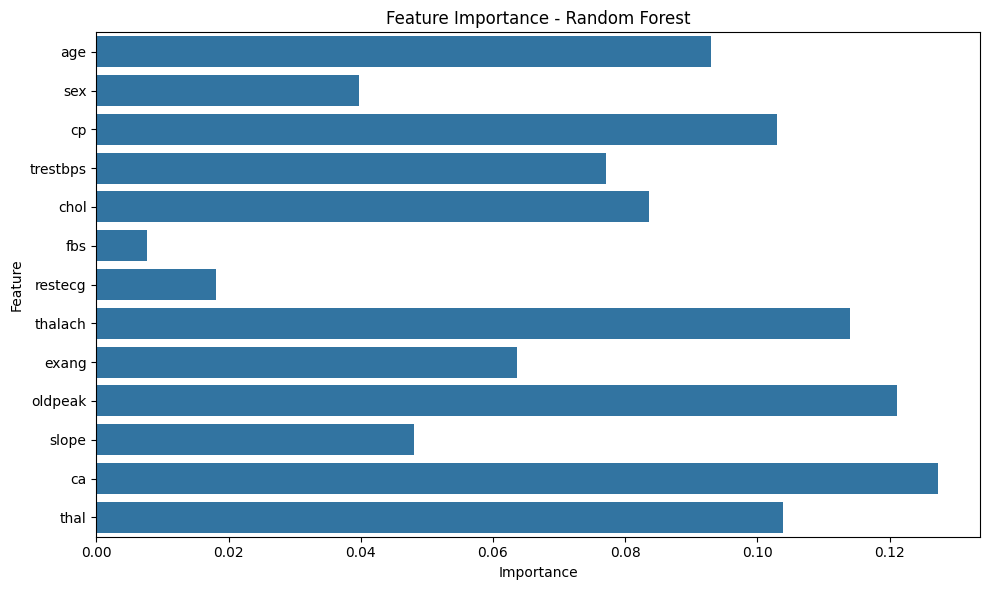

In [15]:
# Random Forest Feature Importance
rf_model = ensemble_models['RandomForest']
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = df.drop("target", axis=1).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.show()


Bar Plot Comparison of F1 Scores

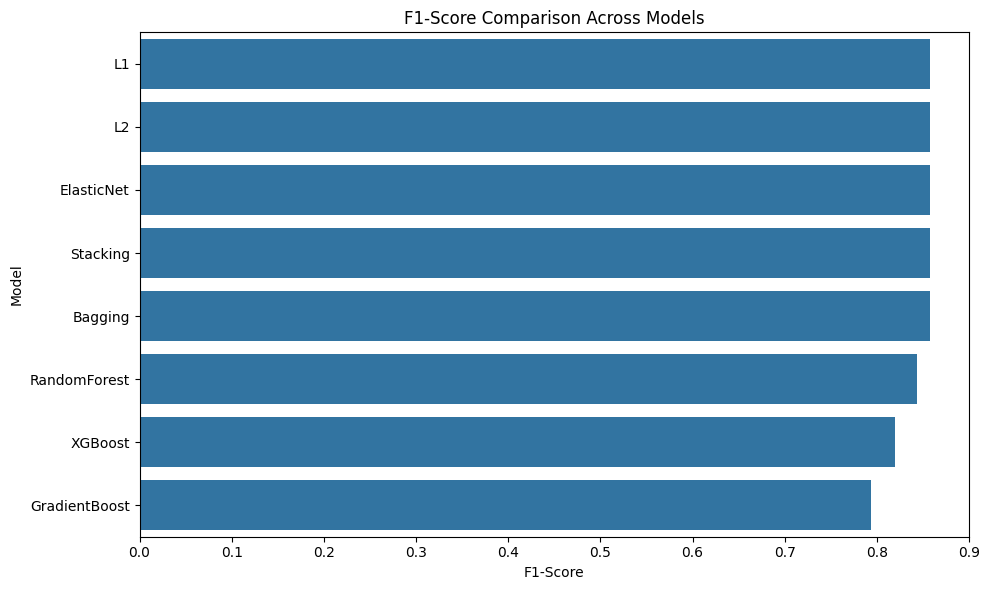

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score', y='Model', data=metrics_df.sort_values(by='F1-Score', ascending=False))
plt.title("F1-Score Comparison Across Models")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig("f1_score_comparison.png")
plt.show()
